In [ ]:
!pip install scikit-multilearn
!pip install transformers

     |████████████████████████████████| 92kB 5.5MB/s 
     |████████████████████████████████| 2.5MB 7.5MB/s 
     |████████████████████████████████| 3.3MB 46.5MB/s 
     |████████████████████████████████| 901kB 47.8MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Thư viện

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
from sklearn.naive_bayes import ComplementNB
import seaborn as sb
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import joblib
import nltk
from sklearn.multioutput import MultiOutputClassifier

from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Conv1D, GlobalMaxPool1D, Dense, Flatten, Dropout, GRU, Bidirectional

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from keras.models import load_model
from joblib import dump
import torch
import pandas as pd
import numpy as np

# Thu vien transformer cho Classification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

# Xu ly label
from sklearn.preprocessing import LabelEncoder

# Metric danh gia 
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Ve do thi
import seaborn as sn
import matplotlib.pyplot as plt

# Đọc dữ liệu

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/ACD_data/ACD_train.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/ACD_data/ACD_dev.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NLP for Data Science/NLP_Project/Data_csv/ACD_data/ACD_test.csv')

df_train.head(10)

,comment,aspect
0,Giá 53k size vừa.,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Nhưng nói chung cũng hơi đắt.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,Mình ăn rất hôi mùi dầu.,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
3,Mình ăn chưa baoh thấy mùi hôi hải sản.,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,3 dĩa vs 2 lon Revive mà có 190k thui(.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
5,Ở đây ngay khu vắng nên khách cũng không đông ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
6,"Quán đông lắm, gọi món phải đợi hơi lâu, ko bi...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]"
7,"Mình uống trà sữa lài hạnh nhân khá thơm nha, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
8,"Không gian trang trí đơn giàn mà ấm cúng, nên ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9,Chè lạnh thì hình như lúc nào cũng là sương sa...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"


In [ ]:
# Chuyển aspect từ string sang list
def astype_aspect(df):
    for i in range(len(df)):
        aspect = df['aspect'][i][1:-1]
        aspect = aspect.split(", ")
        df['aspect'][i] = (list(map(int, aspect)))
    return df

df_train = astype_aspect(df_train)
df_dev = astype_aspect(df_dev)
df_test = astype_aspect(df_test)

# X và y

In [ ]:
X_train = df_train['comment'].values
X_dev = df_dev['comment'].values
X_test = df_test['comment'].values

y_train = df_train['aspect'].values
y_dev = df_dev['aspect'].values
y_test = df_test['aspect'].values

y_train = np.array(list(y_train), dtype=np.float)
y_dev = np.array(list(y_dev), dtype=np.float)
y_test = np.array(list(y_test), dtype=np.float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


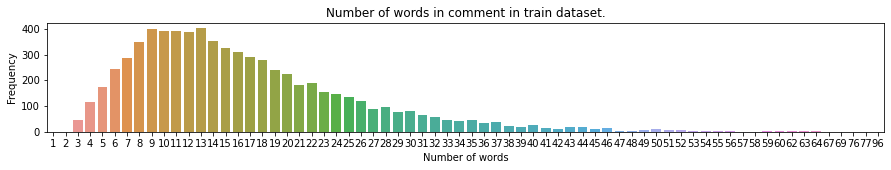

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


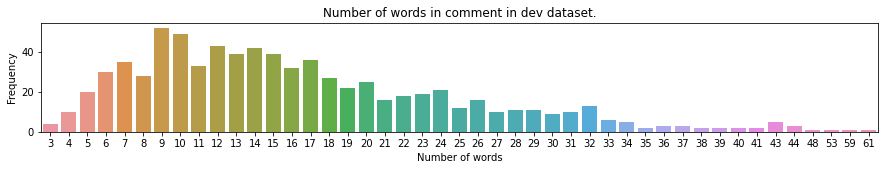

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


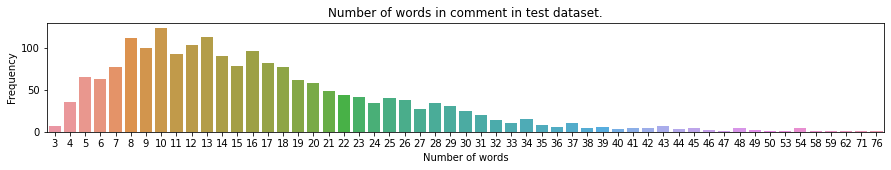

In [ ]:
# Độ dài cmt
def plot_number_word(X, name):
    l = []
    for i in range(len(X)):
        l.append(len(X[i].split()))
    plt.figure(figsize = (15, 2))
    sns.countplot(l)
    plt.title("Number of words in comment in " + name + ' dataset.')
    plt.xlabel("Number of words")
    plt.ylabel("Frequency")
    plt.show()

plot_number_word(X_train, 'train')
plot_number_word(X_dev, 'dev')
plot_number_word(X_test, 'test')

In [ ]:
X_train[:3]

array(['Giá 53k size vừa.', 'Nhưng nói chung cũng hơi đắt.',
       'Mình ăn rất hôi mùi dầu.'], dtype=object)

In [ ]:
y_train[:3]

array([[0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# Check word in Embedding

# No Process
fastText : 
*   Have(4259)
*   No(522)

multi: 
* Have(2268)
* No(2513)

wiki: 
* Have(3549)
* No(1232)

bpemb: 
* Have(2815)
* No(1966)

# ================================================================

In [ ]:
model_name = ["Native Bayes",
              "Logistic Regression",
              "SVM",
              "Text-CNN-fastText",
              "Text-CNN-Wikipedia Word2vec",
              "Text-CNN-BPEmb",
              "Text-CNN-MULTI_WC_F_E_B",
              "Bi-GRU-fastText",
              "Bi-GRU-Wikipedia Word2vec",
              "Bi-GRU-BPEmb",
              "Bi-GRU-MULTI_WC_F_E_B",
              "BERT XLM-R",
              "BERT MULTILINGUAL"
              "FPTAI (cased)",
              "PhoBERT"]

# Model---Naive Bayes

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = BinaryRelevance(ComplementNB())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu record
df = pd.DataFrame({"Model": [model_name[0]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                    "PRECISION-MICRO": [precision_micro_test], 
                    "RECALL-MICRO":[recall_micro_test],
                    "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy train:  0.6014513375071144
Accuracy dev:  0.20492866407263294
Accuracy test:  0.19917440660474717
F1 macro test:  0.2418553508463007
Recall macro test:  0.15798649572585136
Precision macro test:  0.7686096658155481
F1 micro test:  0.3677673432293245
Recall micro test:  0.23088626854317232
Precision micro test:  0.9032738095238095


# Model---Logistic Regression

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = MultiOutputClassifier(LogisticRegression())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[1]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",index = None, header = False, mode = "a")

Accuracy train:  0.39314171883893
Accuracy dev:  0.3631647211413748
Accuracy test:  0.37100103199174406
F1 macro test:  0.44595625330793975
Recall macro test:  0.34165368460731665
Precision macro test:  0.7420852703968697
F1 micro test:  0.6032689450222882
Recall micro test:  0.46329402814758464
Precision micro test:  0.8644428672817601


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model---SVM

In [ ]:
tv = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))
x_train = tv.fit_transform(X_train)
x_dev = tv.transform(X_dev)
x_test = tv.transform(X_test)

model = MultiOutputClassifier(SVC())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)
y_test_pred = model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[2]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",index = None, header = False, mode = "a")

Accuracy train:  0.9160500853727945
Accuracy dev:  0.40077821011673154
Accuracy test:  0.40299277605779155
F1 macro test:  0.4867361791597548
Recall macro test:  0.38873035140538775
Precision macro test:  0.7368795673553308
F1 micro test:  0.6382978723404256
Recall micro test:  0.5077976416888551
Precision micro test:  0.859073359073359


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ========================================================

# Model---Text-CNN---FastText

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test


def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[3]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

Epoch 1/10
28/28 [==============================] - 44s 54ms/step - loss: 0.5050 - accuracy: 0.1837 - val_loss: 0.3135 - val_accuracy: 0.2970
Epoch 2/10
28/28 [==============================] - 1s 25ms/step - loss: 0.2952 - accuracy: 0.3531 - val_loss: 0.2610 - val_accuracy: 0.4319
Epoch 3/10
28/28 [==============================] - 1s 25ms/step - loss: 0.2378 - accuracy: 0.5389 - val_loss: 0.2107 - val_accuracy: 0.6096
Epoch 4/10
28/28 [==============================] - 1s 27ms/step - loss: 0.1837 - accuracy: 0.6639 - val_loss: 0.1750 - val_accuracy: 0.6537
Epoch 5/10
28/28 [==============================] - 1s 27ms/step - loss: 0.1462 - accuracy: 0.7158 - val_loss: 0.1518 - val_accuracy: 0.6783
Epoch 6/10
28/28 [==============================] - 1s 28ms/step - loss: 0.1180 - accuracy: 0.7583 - val_loss: 0.1395 - val_accuracy: 0.6796
Epoch 7/10
28/28 [==============================] - 1s 27ms/step - loss: 0.0953 - accuracy: 0.7999 - val_loss: 0.1318 - val_accuracy: 0.6978
Epoch 8/10
2

In [ ]:
acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

Accuracy train:  0.8837507114399544
Accuracy dev:  0.5979247730220493
Accuracy test:  0.5877192982456141
F1 macro test:  0.7558124559236318
Recall macro test:  0.6996175595924811
Precision macro test:  0.8287123411349486
F1 micro test:  0.7818731117824774
Recall micro test:  0.7383035374667174
Precision micro test:  0.8309075342465754


# Model---Text-CNN---Wikipedia Word2vec

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):

    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[4]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
28/28 [==============================] - 3s 63ms/step - loss: 0.5513 - accuracy: 0.2260 - val_loss: 0.2437 - val_accuracy: 0.4994
Epoch 2/10
28/28 [==============================] - 1s 40ms/step - loss: 0.2130 - accuracy: 0.5716 - val_loss: 0.1981 - val_accuracy: 0.5979
Epoch 3/10
28/28 [==============================] - 1s 40ms/step - loss: 0.1616 - accuracy: 0.6706 - val_loss: 0.1807 - val_accuracy: 0.6291
Epoch 4/10
28/28 [==============================] - 1s 43ms/step - loss: 0.1262 - accuracy: 0.7346 - val_loss: 0.1746 - val_accuracy: 0.6381
Epoch 5/10
28/28 [==============================] - 1s 43ms/step - loss: 0.1070 - accuracy: 0.7677 - val_loss: 0.1696 - val_accuracy: 0.6498
Epoch 6/10
28/28 [==============================] - 1s 45ms/step - loss: 0.0835 - accuracy: 0.7942 - val_loss: 0.1702 - val_accuracy: 0.6537
Epoch 7/10
28/28 [==============================] - 1s 44ms/step - loss: 0.0671 - accuracy: 0.8193 - val_loss: 0.1688 - val_accuracy: 0.6381
Epoch 8/10
28

# Model---Text-CNN---BPEmb

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]
    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors
    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[5]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

     |████████████████████████████████| 1.2MB 8.9MB/s 
downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.model


100%|██████████| 3659179/3659179 [00:01<00:00, 3543833.63B/s]


downloading https://nlp.h-its.org/bpemb/vi/vi.wiki.bpe.vs200000.d300.w2v.bin.tar.gz


100%|██████████| 223674818/223674818 [00:13<00:00, 16225494.48B/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
28/28 [==============================] - 2s 40ms/step - loss: 0.4402 - accuracy: 0.2433 - val_loss: 0.2793 - val_accuracy: 0.4540
Epoch 2/10
28/28 [==============================] - 1s 31ms/step - loss: 0.2492 - accuracy: 0.5177 - val_loss: 0.2185 - val_accuracy: 0.5642
Epoch 3/10
28/28 [==============================] - 1s 30ms/step - loss: 0.1879 - accuracy: 0.6418 - val_loss: 0.1843 - val_accuracy: 0.6031
Epoch 4/10
28/28 [==============================] - 1s 31ms/step - loss: 0.1519 - accuracy: 0.6823 - val_loss: 0.1675 - val_accuracy: 0.6342
Epoch 5/10
28/28 [==============================] - 1s 30ms/step - loss: 0.1271 - accuracy: 0.7290 - val_loss: 0.1555 - val_accuracy: 0.6394
Epoch 6/10
28/28 [==============================] - 1s 32ms/step - loss: 0.1061 - accuracy: 0.7575 - val_loss: 0.1479 - val_accuracy: 0.6537
Epoch 7/10
28/28 [==============================] - 1s 30ms/step - loss: 0.0858 - accuracy: 0.7982 - val_loss: 0.1449 - val_accuracy: 0.6667
Epoch 8/10
28

# Model---Text-CNN---MULTI_WC_F_E_B

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Conv1D(128, 3, activation = 'relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics= ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[6]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

Epoch 1/10
28/28 [==============================] - 2s 41ms/step - loss: 0.5463 - accuracy: 0.1937 - val_loss: 0.3309 - val_accuracy: 0.2594
Epoch 2/10
28/28 [==============================] - 1s 32ms/step - loss: 0.3143 - accuracy: 0.3091 - val_loss: 0.2752 - val_accuracy: 0.4008
Epoch 3/10
28/28 [==============================] - 1s 31ms/step - loss: 0.2548 - accuracy: 0.4801 - val_loss: 0.2277 - val_accuracy: 0.5344
Epoch 4/10
28/28 [==============================] - 1s 32ms/step - loss: 0.2045 - accuracy: 0.5903 - val_loss: 0.1935 - val_accuracy: 0.6005
Epoch 5/10
28/28 [==============================] - 1s 31ms/step - loss: 0.1633 - accuracy: 0.6688 - val_loss: 0.1648 - val_accuracy: 0.6304
Epoch 6/10
28/28 [==============================] - 1s 32ms/step - loss: 0.1348 - accuracy: 0.7145 - val_loss: 0.1473 - val_accuracy: 0.6602
Epoch 7/10
28/28 [==============================] - 1s 34ms/step - loss: 0.1083 - accuracy: 0.7609 - val_loss: 0.1372 - val_accuracy: 0.6796
Epoch 8/10
28

# =============================================

# Model---Bi-GRU---FastText

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/cc.vi.300.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[7]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

Epoch 1/10
28/28 [==============================] - 11s 67ms/step - loss: 0.5765 - accuracy: 0.0746 - val_loss: 0.3384 - val_accuracy: 0.2503
Epoch 2/10
28/28 [==============================] - 1s 36ms/step - loss: 0.3287 - accuracy: 0.2531 - val_loss: 0.3084 - val_accuracy: 0.2853
Epoch 3/10
28/28 [==============================] - 1s 38ms/step - loss: 0.2922 - accuracy: 0.3390 - val_loss: 0.2558 - val_accuracy: 0.4708
Epoch 4/10
28/28 [==============================] - 1s 36ms/step - loss: 0.2414 - accuracy: 0.4920 - val_loss: 0.2140 - val_accuracy: 0.5318
Epoch 5/10
28/28 [==============================] - 1s 36ms/step - loss: 0.1987 - accuracy: 0.5658 - val_loss: 0.1832 - val_accuracy: 0.6018
Epoch 6/10
28/28 [==============================] - 1s 35ms/step - loss: 0.1614 - accuracy: 0.6494 - val_loss: 0.1608 - val_accuracy: 0.6576
Epoch 7/10
28/28 [==============================] - 1s 35ms/step - loss: 0.1304 - accuracy: 0.7206 - val_loss: 0.1475 - val_accuracy: 0.6822
Epoch 8/10
2

# Model---Bi-GRU---Wikipedia Word2vec

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 400
vocab_size = len(tokenizer.word_index) + 1
model_filepath = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/wiki.vi.model.bin'
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[8]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Epoch 1/10
28/28 [==============================] - 5s 73ms/step - loss: 0.5792 - accuracy: 0.1429 - val_loss: 0.3254 - val_accuracy: 0.2594
Epoch 2/10
28/28 [==============================] - 1s 44ms/step - loss: 0.3151 - accuracy: 0.2724 - val_loss: 0.2775 - val_accuracy: 0.4112
Epoch 3/10
28/28 [==============================] - 1s 44ms/step - loss: 0.2694 - accuracy: 0.4029 - val_loss: 0.2341 - val_accuracy: 0.5032
Epoch 4/10
28/28 [==============================] - 1s 45ms/step - loss: 0.2258 - accuracy: 0.5242 - val_loss: 0.1998 - val_accuracy: 0.5629
Epoch 5/10
28/28 [==============================] - 1s 46ms/step - loss: 0.1930 - accuracy: 0.5910 - val_loss: 0.1798 - val_accuracy: 0.6083
Epoch 6/10
28/28 [==============================] - 1s 48ms/step - loss: 0.1703 - accuracy: 0.6490 - val_loss: 0.1639 - val_accuracy: 0.6226
Epoch 7/10
28/28 [==============================] - 1s 48ms/step - loss: 0.1531 - accuracy: 0.6614 - val_loss: 0.1541 - val_accuracy: 0.6252
Epoch 8/10
28

# Model---Bi-GRU---BPEmb

In [ ]:
!pip install bpemb

x_train = X_train
x_dev = X_dev
x_test = X_test

from bpemb import BPEmb
bpemb_vi = BPEmb(lang = 'vi', dim = 300, vs = 200000)

def __get_embedding_dict(model_filepath):
    embedding_dict = {}
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    vocab = [(word, word2vec_model.wv[word]) for word, vectors in word2vec_model.wv.vocab.items()]

    for i in range(len(vocab)):
        word = vocab[i][0]
        vectors = vocab[i][1]
        embedding_dict[word] = vectors

    return embedding_dict

def create_embedding_matrix(model_filepath, word2id):
    """
    Get the embedding matrix of the word2vec model
    :param model_filepath: the file path to the pre-build word2vec model
    :param word2id: the directory mapping from word to id
    :return: the embedding matrix of the word2vec model
    """
    word2vec_model = KeyedVectors.load_word2vec_format(model_filepath, binary=True)
    embeddings_dict = __get_embedding_dict(model_filepath)
    embedding_matrix = np.zeros((len(word2id) + 1, word2vec_model.vector_size))
    for word, idx in word2id.items():
        embedding_vector = embeddings_dict.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix 

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

maxlen = 50
embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
model_filepath = bpemb_vi.emb_file
embedding_matrix = create_embedding_matrix(model_filepath, tokenizer.word_index)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[9]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


Epoch 1/10
28/28 [==============================] - 5s 67ms/step - loss: 0.5477 - accuracy: 0.1094 - val_loss: 0.3348 - val_accuracy: 0.2503
Epoch 2/10
28/28 [==============================] - 1s 34ms/step - loss: 0.3272 - accuracy: 0.2509 - val_loss: 0.2995 - val_accuracy: 0.3424
Epoch 3/10
28/28 [==============================] - 1s 35ms/step - loss: 0.2852 - accuracy: 0.3929 - val_loss: 0.2390 - val_accuracy: 0.4929
Epoch 4/10
28/28 [==============================] - 1s 34ms/step - loss: 0.2293 - accuracy: 0.5191 - val_loss: 0.1990 - val_accuracy: 0.5577
Epoch 5/10
28/28 [==============================] - 1s 34ms/step - loss: 0.1855 - accuracy: 0.6015 - val_loss: 0.1751 - val_accuracy: 0.5992
Epoch 6/10
28/28 [==============================] - 1s 34ms/step - loss: 0.1579 - accuracy: 0.6391 - val_loss: 0.1574 - val_accuracy: 0.6226
Epoch 7/10
28/28 [==============================] - 1s 34ms/step - loss: 0.1353 - accuracy: 0.6940 - val_loss: 0.1470 - val_accuracy: 0.6550
Epoch 8/10
28

# Model---Bi-GRU---MULTI_WC_F_E_B

In [ ]:
x_train = X_train
x_dev = X_dev
x_test = X_test

# Embedding matrix
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype = np.float32)[:embedding_dim]
    return embedding_matrix

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
maxlen = 50
embedding_dim = 300
word_vector = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Word_Embedding/MULTI_W_F_B_E.vec'
embedding_matrix = create_embedding_matrix(word_vector, tokenizer.word_index, embedding_dim)

x_train = tokenizer.texts_to_sequences(x_train)
x_dev = tokenizer.texts_to_sequences(x_dev)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen = maxlen, truncating='post', padding='post')
x_dev = pad_sequences(x_dev, maxlen = maxlen, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = maxlen, truncating='post', padding='post')

n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]

epochs = 10
batch_size = 256

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, 
                    weights = [embedding_matrix], input_length = maxlen, trainable = True))
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.1))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(n_outputs, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# model.summary()

model.fit(x_train, y_train, verbose=1, epochs=epochs, batch_size = batch_size, validation_data = (x_dev, y_dev))

y_train_pred = model.predict(x_train).round() 
y_dev_pred = model.predict(x_dev).round() 
y_test_pred = model.predict(x_test).round() 

acc_train = accuracy_score(y_train, y_train_pred)
acc_dev = accuracy_score(y_dev, y_dev_pred)
acc_test = accuracy_score(y_test, y_test_pred)
f1_macro_test = f1_score(y_test, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

#Lưu record
df = pd.DataFrame({"Model": [model_name[10]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

Epoch 1/10
28/28 [==============================] - 5s 65ms/step - loss: 0.6116 - accuracy: 0.0801 - val_loss: 0.3524 - val_accuracy: 0.2503
Epoch 2/10
28/28 [==============================] - 1s 36ms/step - loss: 0.3373 - accuracy: 0.2437 - val_loss: 0.3260 - val_accuracy: 0.2503
Epoch 3/10
28/28 [==============================] - 1s 37ms/step - loss: 0.3185 - accuracy: 0.2542 - val_loss: 0.2989 - val_accuracy: 0.3100
Epoch 4/10
28/28 [==============================] - 1s 36ms/step - loss: 0.2831 - accuracy: 0.3443 - val_loss: 0.2451 - val_accuracy: 0.4669
Epoch 5/10
28/28 [==============================] - 1s 36ms/step - loss: 0.2271 - accuracy: 0.5059 - val_loss: 0.1959 - val_accuracy: 0.5707
Epoch 6/10
28/28 [==============================] - 1s 36ms/step - loss: 0.1734 - accuracy: 0.6182 - val_loss: 0.1649 - val_accuracy: 0.6226
Epoch 7/10
28/28 [==============================] - 1s 37ms/step - loss: 0.1428 - accuracy: 0.6865 - val_loss: 0.1451 - val_accuracy: 0.6693
Epoch 8/10
28

# =========================================================

In [ ]:
max_len = max([len(text.split(" ")) for text in X_train])

# BERT XLM-R

In [ ]:
class BuildDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, X, y, max_len):
        self.tokenizer = tokenizer
        self.comment_text = X
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels = 12)
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

# Chuan bi data
train_dataset = BuildDataset(tokenizer, X_train, y_train,max_len = max_len)
dev_dataset = BuildDataset(tokenizer,  X_dev, y_dev,max_len = max_len)
test_dataset = BuildDataset(tokenizer,  X_test, y_test,max_len = max_len)

# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    learning_rate = 8e-05,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

def convert_predict_label(predict_label_train):
    for i in range(len(predict_label_train)):
        for j in range(len(predict_label_train[i])):
            if predict_label_train[i][j] > 0.5:
                predict_label_train[i][j] = 1
            else:
                predict_label_train[i][j] = 0
    return predict_label_train

y_train_pred = convert_predict_label(train_dataset_pred.predictions)
y_dev_pred = convert_predict_label(dev_dataset_pred.predictions)
y_test_pred = convert_predict_label(test_dataset_pred.predictions)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/ACD_Not_Process'
result.to_csv(path + '/' + 'xlm-r.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[11]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

Step,Training Loss
500,0.293900
1000,0.136700
1500,0.093900
2000,0.070000
2500,0.046900
3000,0.031500


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_ma

***** Running Prediction *****
  Num examples = 771
  Batch size = 16
***** Running Prediction *****
  Num examples = 1938
  Batch size = 16


Accuracy train:  0.9620091064314172
Accuracy dev:  0.7250324254215305
Accuracy test:  0.7683178534571723
F1 macro test:  0.8634347351268521
Recall macro test:  0.8565906673042948
Precision macro test:  0.8706323822838407
F1 micro test:  0.8709122203098107
Recall micro test:  0.8661087866108786
Precision micro test:  0.8757692307692307


# BERT MULTILINGUAL

In [ ]:
max_len = max([len(text.split(" ")) for text in X_train])
class BuildDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, X, y, max_len):
        self.tokenizer = tokenizer
        self.comment_text = X
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels = 12)
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# Chuan bi data
train_dataset = BuildDataset(tokenizer, X_train, y_train, max_len = max_len)
dev_dataset = BuildDataset(tokenizer,  X_dev, y_dev, max_len = max_len)
test_dataset = BuildDataset(tokenizer,  X_test, y_test, max_len = max_len)

# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    learning_rate = 8e-05,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

def convert_predict_label(predict_label_train):
    for i in range(len(predict_label_train)):
        for j in range(len(predict_label_train[i])):
            if predict_label_train[i][j] > 0.5:
                predict_label_train[i][j] = 1
            else:
                predict_label_train[i][j] = 0
    return predict_label_train

y_train_pred = convert_predict_label(train_dataset_pred.predictions)
y_dev_pred = convert_predict_label(dev_dataset_pred.predictions)
y_test_pred = convert_predict_label(test_dataset_pred.predictions)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/ACD_Not_Process'
result.to_csv(path + '/' + 'bert-multi.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[12]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

***** Running training *****
  Num examples = 7028
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3080
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length wi

Step,Training Loss
500,0.285800
1000,0.146800
1500,0.098500
2000,0.065900
2500,0.040800
3000,0.023800


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_ma

***** Running Prediction *****
  Num examples = 771
  Batch size = 16
***** Running Prediction *****
  Num examples = 1938
  Batch size = 16


Accuracy train:  0.9770916334661355
Accuracy dev:  0.695201037613489
Accuracy test:  0.7239422084623323
F1 macro test:  0.8331421581095776
Recall macro test:  0.8240536115326026
Precision macro test:  0.8436705680372025
F1 micro test:  0.8456813819577735
Recall micro test:  0.8379612019779383
Precision micro test:  0.8535451375435877


# BERT FPTAI/vibert-base-cased



In [ ]:
class BuildDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, X, y, max_len):
        self.tokenizer = tokenizer
        self.comment_text = X
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('FPTAI/vibert-base-cased', num_labels = 12)
tokenizer = AutoTokenizer.from_pretrained('FPTAI/vibert-base-cased')

# Chuan bi data
train_dataset = BuildDataset(tokenizer, X_train, y_train,max_len = max_len)
dev_dataset = BuildDataset(tokenizer,  X_dev, y_dev,max_len = max_len)
test_dataset = BuildDataset(tokenizer,  X_test, y_test,max_len = max_len)

# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

def convert_predict_label(predict_label_train):
    for i in range(len(predict_label_train)):
        for j in range(len(predict_label_train[i])):
            if predict_label_train[i][j] > 0.5:
                predict_label_train[i][j] = 1
            else:
                predict_label_train[i][j] = 0
    return predict_label_train

y_train_pred = convert_predict_label(train_dataset_pred.predictions)
y_dev_pred = convert_predict_label(dev_dataset_pred.predictions)
y_test_pred = convert_predict_label(test_dataset_pred.predictions)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/ACD_Not_Process'
result.to_csv(path + '/' + 'vibert-base-cased.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[12]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp_oj7h7rw


storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
creating metadata file for /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
loading configuration file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/ac830dbe95fda61dfb6f6479706d481dd2c7c2ed4b9064b5fb56ecc53f0ed2fa.7d942d26e554f7243a0055f745a11844b215e58ac9e8a5dc60dbf1ec3c474a71
Model config BertConfig {
  "_num_labels": 2,
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    

storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a
creating metadata file for /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a
loading weights file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/3b6bb982f8f72144ec767bb8989b8c461701c754926d55b2de1246236b033a41.2008df591695a6a2b7c9fecb024177ee92349c5d089f9063ea0413bbb07c3e5a


Some weights of the model checkpoint at FPTAI/vibert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

storing https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
creating metadata file for /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/c155f922cc460ace2ddcb1485f2768b33a43a86e4c6fea76677b773dfff3b232.3d46541cba3b17f4b15f094a380f7c83603387b794207b9b1f1b9dfd58b1d1c4
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/tokenizer.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/FPTAI/vibert-base-cased/resol

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 7028
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3080
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2

Step,Training Loss
500,0.343500
1000,0.156600
1500,0.094900
2000,0.055600
2500,0.033300
3000,0.021400


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_ma

***** Running Prediction *****
  Num examples = 771
  Batch size = 16
***** Running Prediction *****
  Num examples = 1938
  Batch size = 16


Accuracy train:  0.9830677290836654
Accuracy dev:  0.6809338521400778
Accuracy test:  0.7074303405572755
F1 macro test:  0.8174296523600089
Recall macro test:  0.7895521858588829
Precision macro test:  0.8491700860796292
F1 micro test:  0.8312195121951219
Recall micro test:  0.8101939901103081
Precision micro test:  0.8533653846153846


# BERT vinai/phobert-base

     |████████████████████████████████| 2.7MB 36.2MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp37-none-any.whl size=2645952 sha256=d2a2717d4c74a28b2292d5f834e844014dc3dd21b7f40a63db93509a648a9cab
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp
Cloning into 'VnCoreNLP'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 54 (delta 1), reused 41 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


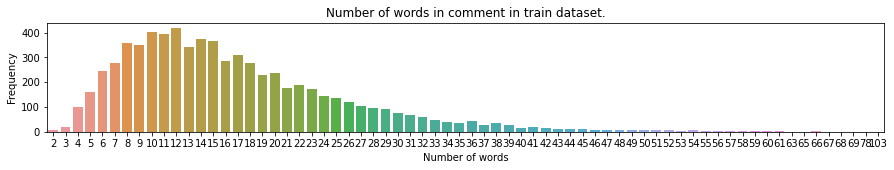

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


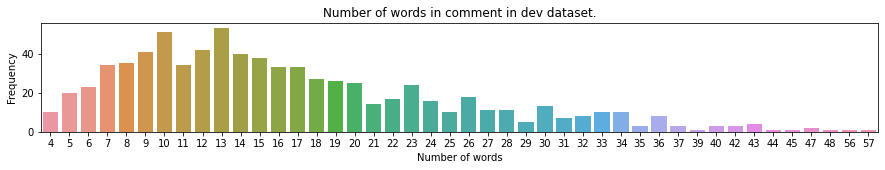

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


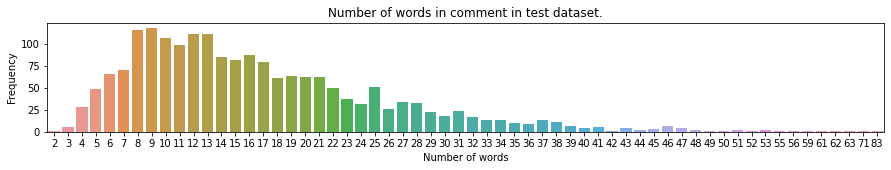

In [ ]:
# VNCoreNLP tách từ
!pip install deplacy vncorenlp
!test -d VnCoreNLP || git clone --depth=1 https://github.com/vncorenlp/VnCoreNLP
from vncorenlp import VnCoreNLP
vncorenlp = VnCoreNLP("VnCoreNLP/VnCoreNLP-1.1.1.jar",annotators="wseg")
def vncore_tokenize(document):
    l = vncorenlp.tokenize(document)[0]
    document = ''
    for i in range(len(l)):
        document += l[i] + ' '
    document = document[:-1]
    return document

def text_preprocessing(X):
    for i in range(len(X)):
        X[i] = vncore_tokenize(X[i])
    return X

X_train = text_preprocessing(X_train)
X_dev = text_preprocessing(X_dev)
X_test = text_preprocessing(X_test)

# Độ dài cmt
def plot_number_word(X, name):
    l = []
    for i in range(len(X)):
        l.append(len(X[i].split()))
    plt.figure(figsize = (15, 2))
    sns.countplot(l)
    plt.title("Number of words in comment in " + name + ' dataset.')
    plt.xlabel("Number of words")
    plt.ylabel("Frequency")
    plt.show()

plot_number_word(X_train, 'train')
plot_number_word(X_dev, 'dev')
plot_number_word(X_test, 'test')

In [ ]:
max_len = max([len(text.split(" ")) for text in X_train])
class BuildDataset(torch.utils.data.Dataset):

    def __init__(self, tokenizer, X, y, max_len):
        self.tokenizer = tokenizer
        self.comment_text = X
        self.targets = y
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        comment_text = str(self.comment_text[index])
        comment_text = " ".join(comment_text.split())

        inputs = self.tokenizer.encode_plus(
            comment_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }

# Khai bao pre-trained
model = AutoModelForSequenceClassification.from_pretrained('vinai/phobert-base', num_labels = 12)
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

# Chuan bi data
train_dataset = BuildDataset(tokenizer, X_train, y_train,max_len = max_len)
dev_dataset = BuildDataset(tokenizer,  X_dev, y_dev,max_len = max_len)
test_dataset = BuildDataset(tokenizer,  X_test, y_test,max_len = max_len)


# Chuan bi mo hinh

training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs = 7,              
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    warmup_steps=500,                
    weight_decay=0.01,
    no_cuda=False
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()

train_dataset_pred = trainer.predict(train_dataset)
dev_dataset_pred = trainer.predict(dev_dataset)
test_dataset_pred = trainer.predict(test_dataset)

def convert_predict_label(predict_label_train):
    for i in range(len(predict_label_train)):
        for j in range(len(predict_label_train[i])):
            if predict_label_train[i][j] > 0.5:
                predict_label_train[i][j] = 1
            else:
                predict_label_train[i][j] = 0
    return predict_label_train

y_train_pred = convert_predict_label(train_dataset_pred.predictions)
y_dev_pred = convert_predict_label(dev_dataset_pred.predictions)
y_test_pred = convert_predict_label(test_dataset_pred.predictions)

y_train_true = train_dataset_pred.label_ids
y_dev_true = dev_dataset_pred.label_ids
y_test_true = test_dataset_pred.label_ids

# Danh gia mo hinh
acc_train = accuracy_score(y_train_true, y_train_pred)
acc_dev = accuracy_score(y_dev_true, y_dev_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)
f1_macro_test = f1_score(y_test_true, y_test_pred, average='macro')
recall_macro_test = recall_score(y_test_true, y_test_pred, average='macro')
precision_macro_test = precision_score(y_test_true, y_test_pred, average='macro')
f1_micro_test = f1_score(y_test_true, y_test_pred, average='micro')
recall_micro_test = recall_score(y_test_true, y_test_pred, average='micro')
precision_micro_test = precision_score(y_test_true, y_test_pred, average='micro')
print('=================================================================================')
print('Accuracy train: ', acc_train)
print('Accuracy dev: ', acc_dev)
print('Accuracy test: ', acc_test)
print('F1 macro test: ', f1_macro_test)
print('Recall macro test: ', recall_macro_test)
print('Precision macro test: ', precision_macro_test)
print('F1 micro test: ', f1_micro_test)
print('Recall micro test: ', recall_micro_test)
print('Precision micro test: ', precision_micro_test)

# Lưu dự đoán
result = pd.DataFrame([X_test, y_test_true, y_test_pred]).T
result.columns = ['text', 'true_label', 'pred_label']
path = '/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Predict CSV/ACD_Not_Process'
result.to_csv(path + '/' + 'phoBert.csv', index=False)
result.head()

#Lưu record
df = pd.DataFrame({"Model": [model_name[13]],
                   "ACC_TRAIN": [acc_train],
                   "ACC_DEV": [acc_dev],
                   "ACC_TEST": [acc_test],
                   "PRECISION-MACRO": [precision_macro_test],
                   "RECALL-MACRO":[recall_macro_test],
                    "F1-MACRO": [f1_macro_test],
                   "PRECISION-MICRO": [precision_micro_test],
                   "RECALL-MICRO":[recall_micro_test],
                   "F1-MICRO": [f1_micro_test]})
df.to_csv("/content/drive/MyDrive/NLP for Data Science/NLP_Project/Source Code/Evaluate/ACD_Not_Process/ACD_Not_Process.csv",
          index = None, header = False, mode = "a")

https://huggingface.co/vinai/phobert-base/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpknjci3xk


storing https://huggingface.co/vinai/phobert-base/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
creating metadata file for /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
loading configuration file https://huggingface.co/vinai/phobert-base/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/a596f267f08b7158c7ab6300b1bf98eb6e1b05e6bcb0d7c18a8070364ee3011b.bbe27b2cac909b2279c83792c2d2b6f159f0a95f5d1c1eb66451da1c89a53609
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  

storing https://huggingface.co/vinai/phobert-base/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85
creating metadata file for /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85
loading weights file https://huggingface.co/vinai/phobert-base/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/8363542cfd9e2bad1a9a618e87ea1153d84819a3ae581cff0816a2c1f610f433.42a5e558f15db4cc3af338445707272b8f7545df78efdc125d3fd51025b22d85


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

storing https://huggingface.co/vinai/phobert-base/resolve/main/vocab.txt in cache at /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
creating metadata file for /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpxzg930kz


storing https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes in cache at /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
creating metadata file for /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd


loading file https://huggingface.co/vinai/phobert-base/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/970c6224b2713c8b52a7bcfc4d5a951c9bb88302e4523388b50f28284e87ac44.26ba0c8945e559c68d0bc35d24fea16f5463a49fe8f134e0c32261d590b577fa
loading file https://huggingface.co/vinai/phobert-base/resolve/main/bpe.codes from cache at /root/.cache/huggingface/transformers/f3a66ae0a78d1a53b3eb99e31837d0d8e2f684a2dcc1f52f75fd36873e3d79de.301ac8958de708ddcea8500d9acbe6261dba391d249c98dcda1e49dbbff870dd
loading file https://huggingface.co/vinai/phobert-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/tokenizer_config.json from cache at None
loading file https://huggingface.co/vinai/phobert-base/resolve/main/tokenizer.json from cache at None
Adding <mask> to the vocabulary
Special tokens have b

Step,Training Loss
500,0.340300
1000,0.124500
1500,0.069500
2000,0.042800
2500,0.027100
3000,0.018700


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_ma

***** Running Prediction *****
  Num examples = 771
  Batch size = 16
***** Running Prediction *****
  Num examples = 1938
  Batch size = 16


Accuracy train:  0.9839214570290268
Accuracy dev:  0.767833981841764
Accuracy test:  0.782249742002064
F1 macro test:  0.869136809028082
Recall macro test:  0.8595349199643175
Precision macro test:  0.8794879299586028
F1 micro test:  0.8763399693721287
Recall micro test:  0.8706732597945988
Precision micro test:  0.8820809248554913
